# Back To Basics
##  Simple but powerful python techniques

# [Colab version](https://colab.research.google.com/drive/1nyZIB_zC4iFe4JK9nYvEZyIJsVQrexFL?usp=sharing)

# Contents:
* ```String``` tricks
* The ```os``` module 
* The ```dict()``` constructor
* Tricks with lists
* ```Numpy``` arrays and maths

We've covered some python fundamentals in the [**BasicBitsPython**](https://github.com/UoMMIB/Python-Club/blob/master/Tutorials/BasicBitsPython.ipynb) notebook,  including:
* Comments and variables
* Loops
* Functions
* Dictionaries
and we used what we'd learnt to [translate](https://en.wikipedia.org/wiki/Translation_(biology)) some DNA into the amino acid sequence that it codes for, which folds up to look like this:

# Background - 🔬
In this tutorial, we'll look at some simple, but powerful commands to find out more about this protein. Here's the sequence that we translated from the DNA:
```
MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAPGRVTRYLS
SQRLIKEACDESRFDKNLSQALKFVRDFAGDGLFTSWTHEKNWKKAHNILLPSFSQQAMKGYHAMM
VDIAVQLVQKWERLNADEHIEVPEDMTRLTLDTIGLCGFNYRFNSFYRDQPHPFITSMVRALDEAM
NKLQRANPDDPAYDENKRQFQEDIKVMNDLVDKIIADRKASGEQSDDLLTHMLNGKDPETGEPLDD
ENIRYQIITFLIAGHETTSGLLSFALYFLVKNPHVLQKAAEEAARVLVDPVPSYKQVKQLKYVGMV
LNEALRLWPTAPAFSLYAKEDTVLGGEYPLEKGDELMVLIPQLHRDKTIWGDDVEEFRPERFENPS
AIPQHAFKPFGNGQRACIGQQFALHEATLVLGMMLKHFDFEDHTNYELDIKETLTLKPEGFVVKAK
SKKIPLGGIPSPSTEQSAKKVRKKGC*
```
Each letter represents an [**amino acid**](https://en.wikipedia.org/wiki/Amino_acid) - each with the same 'backbone':
![](glycine.png)

But each has its own side-chain, with its own chemical properties, like charge and other features that make the chain of amino-acids fold into a functioning protein.

![](amino-acids.png)

Amino acids are chained together by their backbones, here's  a chain of ```MTI``` :

![](peptide.png)

In our case, the chain of amino acids folds around a [**heme**](https://en.wikipedia.org/wiki/Heme_B), a red molecule which is used to oxidise fats - a controlled burn in the centre of the protein. 

![](heme.png)

Which fats can get into the centre of the protein is determined by the enzymes shape, and the chemical properties of the tunnel that leads to the core. We can find the structures of some of these proteins using a technique called [**X-ray crystallography**](https://en.wikipedia.org/wiki/X-ray_crystallography). Here's a snapshot of our enzyme - the [**Cytochrome P450**](https://en.wikipedia.org/wiki/Cytochrome_P450): [**BM3**](BM3-Reveiw-Andy-Munro.pdf).

[**PDB ID: 1bu7**](https://www.ebi.ac.uk/pdbe/entry/pdb/1bu7/index) - see this link for an interactive view

![](tutorial-data/1bu7-molstar-image.png)


The ability to 'do chemistry' is what makes this protein an [**enzyme**](https://en.wikipedia.org/wiki/Enzyme), which are an important part of the biotechnology research we do at the [Manchester Institute of Biotechnology
](https://en.wikipedia.org/wiki/Manchester_Institute_of_Biotechnology) - especially [**engineering**](https://en.wikipedia.org/wiki/Cytochrome_P450_engineering) them to do new chemical reactions that can help with agriculture, drug development and making industrial chemical processes more environmentally friendly.

# Problem #1 - ```string``` parsing
Here's a table of some calculated chemical properties of each of the 20 amino acids listed above. We could have found this on a web page. 
We don't have time to download the information in a clean file, we need it now! 🏃

In this section we copy and paste the table into our notebook as a ```string``` and extract the data into a usable format!


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>MolWT</th>
      <th>LogP</th>
      <th>HBondDonors</th>
      <th>HBondAcceptors</th>
      <th>nAromaticRings</th>
      <th>nHeteroAtoms</th>
      <th>nRotatableBonds</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>A</th>
      <td>89.047678</td>
      <td>-0.58180</td>
      <td>3</td>
      <td>3</td>
      <td>0</td>
      <td>3</td>
      <td>3</td>
    </tr>
    <tr>
      <th>C</th>
      <td>121.019749</td>
      <td>-0.67190</td>
      <td>3</td>
      <td>3</td>
      <td>0</td>
      <td>4</td>
      <td>4</td>
    </tr>
    <tr>
      <th>D</th>
      <td>133.037508</td>
      <td>-1.12700</td>
      <td>4</td>
      <td>5</td>
      <td>0</td>
      <td>5</td>
      <td>4</td>
    </tr>
    <tr>
      <th>E</th>
      <td>147.053158</td>
      <td>-0.73690</td>
      <td>4</td>
      <td>5</td>
      <td>0</td>
      <td>5</td>
      <td>5</td>
    </tr>
    <tr>
      <th>F</th>
      <td>165.078979</td>
      <td>0.64100</td>
      <td>3</td>
      <td>3</td>
      <td>1</td>
      <td>3</td>
      <td>4</td>
    </tr>
    <tr>
      <th>G</th>
      <td>75.032028</td>
      <td>-0.97030</td>
      <td>3</td>
      <td>3</td>
      <td>0</td>
      <td>3</td>
      <td>2</td>
    </tr>
    <tr>
      <th>H</th>
      <td>155.069477</td>
      <td>-0.63590</td>
      <td>4</td>
      <td>5</td>
      <td>1</td>
      <td>5</td>
      <td>4</td>
    </tr>
    <tr>
      <th>I</th>
      <td>131.094629</td>
      <td>0.44440</td>
      <td>3</td>
      <td>3</td>
      <td>0</td>
      <td>3</td>
      <td>6</td>
    </tr>
    <tr>
      <th>K</th>
      <td>146.105528</td>
      <td>-0.47270</td>
      <td>5</td>
      <td>4</td>
      <td>0</td>
      <td>4</td>
      <td>7</td>
    </tr>
    <tr>
      <th>L</th>
      <td>131.094629</td>
      <td>0.44440</td>
      <td>3</td>
      <td>3</td>
      <td>0</td>
      <td>3</td>
      <td>6</td>
    </tr>
    <tr>
      <th>M</th>
      <td>149.051050</td>
      <td>0.15140</td>
      <td>3</td>
      <td>3</td>
      <td>0</td>
      <td>4</td>
      <td>6</td>
    </tr>
    <tr>
      <th>N</th>
      <td>132.053492</td>
      <td>-1.72630</td>
      <td>5</td>
      <td>5</td>
      <td>0</td>
      <td>5</td>
      <td>4</td>
    </tr>
    <tr>
      <th>P</th>
      <td>115.063329</td>
      <td>-0.17700</td>
      <td>2</td>
      <td>3</td>
      <td>0</td>
      <td>3</td>
      <td>1</td>
    </tr>
    <tr>
      <th>Q</th>
      <td>146.069142</td>
      <td>-1.33620</td>
      <td>5</td>
      <td>5</td>
      <td>0</td>
      <td>5</td>
      <td>5</td>
    </tr>
    <tr>
      <th>R</th>
      <td>174.111676</td>
      <td>-1.33843</td>
      <td>7</td>
      <td>6</td>
      <td>0</td>
      <td>6</td>
      <td>6</td>
    </tr>
    <tr>
      <th>S</th>
      <td>105.042593</td>
      <td>-1.60940</td>
      <td>4</td>
      <td>4</td>
      <td>0</td>
      <td>4</td>
      <td>4</td>
    </tr>
    <tr>
      <th>T</th>
      <td>119.058243</td>
      <td>-1.22090</td>
      <td>4</td>
      <td>4</td>
      <td>0</td>
      <td>4</td>
      <td>5</td>
    </tr>
    <tr>
      <th>V</th>
      <td>117.078979</td>
      <td>0.05430</td>
      <td>3</td>
      <td>3</td>
      <td>0</td>
      <td>3</td>
      <td>5</td>
    </tr>
    <tr>
      <th>W</th>
      <td>204.089878</td>
      <td>1.12230</td>
      <td>4</td>
      <td>4</td>
      <td>2</td>
      <td>4</td>
      <td>4</td>
    </tr>
    <tr>
      <th>Y</th>
      <td>181.073893</td>
      <td>0.34660</td>
      <td>4</td>
      <td>4</td>
      <td>1</td>
      <td>4</td>
      <td>5</td>
    </tr>
  </tbody>
</table>

In [1]:
# I've used triple quotes to make a multi-line string

data = '''MolWT	LogP	HBondDonors	HBondAcceptors	nAromaticRings	nHeteroAtoms	nRotatableBonds
A	89.047678	-0.58180	3	3	0	3	3
C	121.019749	-0.67190	3	3	0	4	4
D	133.037508	-1.12700	4	5	0	5	4
E	147.053158	-0.73690	4	5	0	5	5
F	165.078979	0.64100	3	3	1	3	4
G	75.032028	-0.97030	3	3	0	3	2
H	155.069477	-0.63590	4	5	1	5	4
I	131.094629	0.44440	3	3	0	3	6
K	146.105528	-0.47270	5	4	0	4	7
L	131.094629	0.44440	3	3	0	3	6
M	149.051050	0.15140	3	3	0	4	6
N	132.053492	-1.72630	5	5	0	5	4
P	115.063329	-0.17700	2	3	0	3	1
Q	146.069142	-1.33620	5	5	0	5	5
R	174.111676	-1.33843	7	6	0	6	6
S	105.042593	-1.60940	4	4	0	4	4
T	119.058243	-1.22090	4	4	0	4	5
V	117.078979	0.05430	3	3	0	3	5
W	204.089878	1.12230	4	4	2	4	4
Y	181.073893	0.34660	4	4	1	4	5'''

data # try running print(data) - what's the difference?

'MolWT\tLogP\tHBondDonors\tHBondAcceptors\tnAromaticRings\tnHeteroAtoms\tnRotatableBonds\nA\t89.047678\t-0.58180\t3\t3\t0\t3\t3\nC\t121.019749\t-0.67190\t3\t3\t0\t4\t4\nD\t133.037508\t-1.12700\t4\t5\t0\t5\t4\nE\t147.053158\t-0.73690\t4\t5\t0\t5\t5\nF\t165.078979\t0.64100\t3\t3\t1\t3\t4\nG\t75.032028\t-0.97030\t3\t3\t0\t3\t2\nH\t155.069477\t-0.63590\t4\t5\t1\t5\t4\nI\t131.094629\t0.44440\t3\t3\t0\t3\t6\nK\t146.105528\t-0.47270\t5\t4\t0\t4\t7\nL\t131.094629\t0.44440\t3\t3\t0\t3\t6\nM\t149.051050\t0.15140\t3\t3\t0\t4\t6\nN\t132.053492\t-1.72630\t5\t5\t0\t5\t4\nP\t115.063329\t-0.17700\t2\t3\t0\t3\t1\nQ\t146.069142\t-1.33620\t5\t5\t0\t5\t5\nR\t174.111676\t-1.33843\t7\t6\t0\t6\t6\nS\t105.042593\t-1.60940\t4\t4\t0\t4\t4\nT\t119.058243\t-1.22090\t4\t4\t0\t4\t5\nV\t117.078979\t0.05430\t3\t3\t0\t3\t5\nW\t204.089878\t1.12230\t4\t4\t2\t4\t4\nY\t181.073893\t0.34660\t4\t4\t1\t4\t5'

# ```\t``` & ```\n```

```\``` is an [**escape character**](https://en.wikipedia.org/wiki/Escape_character) - it precedes a character that needs special treatment. In this case:
* ```\t``` means ```tab``` 
* ```\n``` means ```newline``` 

# The ```io``` module

In [2]:
import pandas as pd
import io

pd.read_csv(io.StringIO(data), delimiter = '\t')

,MolWT,LogP,HBondDonors,HBondAcceptors,nAromaticRings,nHeteroAtoms,nRotatableBonds
A,89.047678,-0.58180,3,3,0,3,3
C,121.019749,-0.67190,3,3,0,4,4
D,133.037508,-1.12700,4,5,0,5,4
E,147.053158,-0.73690,4,5,0,5,5
F,165.078979,0.64100,3,3,1,3,4
G,75.032028,-0.97030,3,3,0,3,2
H,155.069477,-0.63590,4,5,1,5,4
I,131.094629,0.44440,3,3,0,3,6
K,146.105528,-0.47270,5,4,0,4,7
L,131.094629,0.44440,3,3,0,3,6


# How about with ```string``` tricks?

Using the ```io``` module is very convenient for reading data, but how about some generally useful techniques with strings and basic datatypes? In this section we'll use some techniques that don't rely on importing modules to turn our string into something useable.

# Exercise
Here are the steps we'll take to get a ```dictionary``` of our data, which we can easily use to look up molecular properties of each amino acid.
1. Split the ```data``` string into rows - ```split()```
2. Split the rows into columns - ```split()```
3. Use ```for``` loops and list indexing to extract: coulmn headers, table index, table entry values like:
```python
['MolWT',  'LogP',  'HBondDonors',  'HBondAcceptors',  'nAromaticRings',  'nHeteroAtoms',  'nRotatableBonds']
&
['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
```
4. Use the coulmn headers, table index, table entry values to make a dictionary for an amino acid like:

```python
# for A
{'MolWT': '89.047678',
  'LogP': '-0.58180',
  'HBondDonors': '3',
  'HBondAcceptors': '3',
  'nAromaticRings': '0',
  'nHeteroAtoms': '3',
  'nRotatableBonds': '3'}
```
5. Make a ```dictionary``` of the amino acid ```dictionaries```  like:

```python
{'A': {'MolWT': '89.047678',
  'LogP': '-0.58180',
  'HBondDonors': '3',
  'HBondAcceptors': '3',
  'nAromaticRings': '0',
  'nHeteroAtoms': '3',
  'nRotatableBonds': '3'},
 'C': {'MolWT': '121.019749',
  'LogP': '-0.67190',
  'HBondDonors': '3',
  'HBondAcceptors': '3'
       ...
```

6. Use the ```dictionary``` to find the total molecular weight of the protein

# Techniques:
#### Check out Chapter 41: String Methods in [Python notes for professionals (free ebook)](https://books.goalkicker.com/PythonBook/) for more string methods

## ```split()```

Let's split ```data``` by row. ```split()``` is a function that splits string on a particular character, it works like this:
```python
>>> "Let's split ```data``` by row. ```split()``` is a function that splits string on a particular character".split(' ') 

# splitting on ' ' is default - 🤫
# see how the function comes from the string?
# that's because it's a method that 'belongs' to the string type of object
# run dir(<string>) to see other methods that belong to strings
# or run help(<string>) for more info on strings
>>> ["Let's", 'split', '```data```', 'by', 'row.', '```split()```', 'is', 'a', 'function', 'that', 'splits', 'string', 'on', 'a', 'particular', 'character']
```
## ```for``` loops:
#### For more detail on loops and ```list comprehensions``` (for loops in a single line) look at our [list comprehension tutorial](https://github.com/UoMMIB/Python-Club/blob/master/Tutorials/ListComprehensions.ipynb) or even better: Chapter 21 of [Python notes for professionals](https://books.goalkicker.com/PythonBook/) 


#### Filling ```lists``` and ```dictionaries``` using ```for``` loops:
One way to fill a ```list``` or ```dictionary``` with items using ```for``` loops is to create the ```list``` or ```dictionary``` outside the loop, and then use the ```list``` or ```dictionary``` specific methods to add items to that ```list``` or ```dictionary```:
```python
# things to loop through
letters = ['a','b','c','d','e']
numbers = [1,2,3,4,5]

l = [] # empty list
d = {} # enpty dictionary

for i,j in zip(letters, numbers):
    # loop through letters and numbers at the same time
    # i = letter; j = number
    l.append(i) # add letter to list
    d[i] = j # add number to dictionary under key letter
    
# l = ['a', 'b', 'c', 'd', 'e']
# d = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
```

# 1. Split the ```data``` string into a list of rows
# 2. Split each row into a list of values
# to get a list of lists, save that variable as something like ```table```

# 3.1 Extract the top row (column headers) of your ```table``` using *list slicing*
### Keep the top row saved as a variable like ```header```

### You'll need to use list ```slicing``` (chapter 64 in [Python notes for professionals](https://books.goalkicker.com/PythonBook/))

List slicing is the name for getting one or more item from a list, and other objects that behave similarly. It has a distinctive ```[square brackets``` notation. Here are some quick syntax rules for slicing:
```python
l = [1,2,3,4,5,6,7,8,9,10]

# syntax:
l[<start>:<stop>:<step size>]
# leaving out start, stop or step, the interpreter will assume:
<start> = 0
<stop> = end
<step size> = 1
# first item
>>> l[0] # python starts counting at zero - why waste a whole number?
>>> 1
# last item
>>> l[-1]
>>> 10
# items 0-4
>>> l[0:4]
>>> [1, 2, 3, 4]
# 4 onwards
>>> l[4:]
>>> [5, 6, 7, 8, 9, 10]
# ever other number between 2 and 8
>>> l[1:8:2]
>>> [2, 4, 6, 8]

```

# 3.2 Extract the row names (index) from your ```table```

You may have to loop through your list of lists to find these items

# 3.3 Extract the table entries from your ```table```, excluding the headers and the index

# 3.4 Change the ```data type``` of the table entries from ```sting``` to ```float```
### Hints:
```python
>>> '131.094629' + 5
>>> TypeError

>>> float('131.094629') + 5
>>> 136.094629
```
### Use a ```for``` loop within a ```for``` loop, or a ```list comprehension``` within a ```list comprehension```

# 4. Create a ```dictionary``` like: ```{'MolWT': <value>, ...}``` for amino acid ```A``` - alanine
![](alanine.png)

# 5.1 Create a ```dictionary``` for each amino acid's properties, and store each ```dictionary``` within another dictionary like:

```python
{'A': {'MolWT': '89.047678',
  'LogP': '-0.58180',
  'HBondDonors': '3',
  'HBondAcceptors': '3',
  'nAromaticRings': '0',
  'nHeteroAtoms': '3',
  'nRotatableBonds': '3'},
 'C': {'MolWT': '121.019749',
  'LogP': '-0.67190',
  'HBondDonors': '3',
  'HBondAcceptors': '3',
       ...
       ```

# 5.2 - Using the ```dictionary``` 
Information stored in a ```dictionary```can be accessed using ```keys```. Our top layer ```dictionary``` has keys like:

```python
['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
```

Which correspond to our amino acids. We can use the keys to access the corresponding dictionary items with syntax similar to ```slicing```:

```python
>>> d['A']
>>> {'MolWT': '89.047678',
 'LogP': '-0.58180',
 'HBondDonors': '3',
 'HBondAcceptors': '3',
 'nAromaticRings': '0',
 'nHeteroAtoms': '3',
 'nRotatableBonds': '3'}
```

#### I've made a dictionary called ```d``` below, which contains dictionaries of properties for each amino acid.
# Find the ```nAromaticRings``` of ```W``` (tryptophan)

In [3]:
# answers - for just in case you need them
from backtobasics import   extract_data_with_list_comprehensions
d = extract_data_with_list_comprehensions(data)

# 6. Use this dictionary to find the total MolWT (molecular weight) of the protein 
#### Hint: add 616.5 (molecular weight of heme) to the total weight of all the amino acids

### 🧬 The sequence is at the top of this notebook 🧬

### Steps:
1. Save the sequence above as a string
2. Use the ```<string>.replace(<from>,<to>)``` to replace ```\n``` and ```*``` (end of sequence) characters
3. Loop through the sequence, for each letter, lookup the corresponding ```MolWT```
4. ```sum()``` the ```MolWT``` for each amino acid and add  ```616.5``` to account for the heme

In [4]:
s = '''MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAPGRVTRYLS
SQRLIKEACDESRFDKNLSQALKFVRDFAGDGLFTSWTHEKNWKKAHNILLPSFSQQAMKGYHAMM
VDIAVQLVQKWERLNADEHIEVPEDMTRLTLDTIGLCGFNYRFNSFYRDQPHPFITSMVRALDEAM
NKLQRANPDDPAYDENKRQFQEDIKVMNDLVDKIIADRKASGEQSDDLLTHMLNGKDPETGEPLDD
ENIRYQIITFLIAGHETTSGLLSFALYFLVKNPHVLQKAAEEAARVLVDPVPSYKQVKQLKYVGMV
LNEALRLWPTAPAFSLYAKEDTVLGGEYPLEKGDELMVLIPQLHRDKTIWGDDVEEFRPERFENPS
AIPQHAFKPFGNGQRACIGQQFALHEATLVLGMMLKHFDFEDHTNYELDIKETLTLKPEGFVVKAK
SKKIPLGGIPSPSTEQSAKKVRKKGC*'''
s

'MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAPGRVTRYLS\nSQRLIKEACDESRFDKNLSQALKFVRDFAGDGLFTSWTHEKNWKKAHNILLPSFSQQAMKGYHAMM\nVDIAVQLVQKWERLNADEHIEVPEDMTRLTLDTIGLCGFNYRFNSFYRDQPHPFITSMVRALDEAM\nNKLQRANPDDPAYDENKRQFQEDIKVMNDLVDKIIADRKASGEQSDDLLTHMLNGKDPETGEPLDD\nENIRYQIITFLIAGHETTSGLLSFALYFLVKNPHVLQKAAEEAARVLVDPVPSYKQVKQLKYVGMV\nLNEALRLWPTAPAFSLYAKEDTVLGGEYPLEKGDELMVLIPQLHRDKTIWGDDVEEFRPERFENPS\nAIPQHAFKPFGNGQRACIGQQFALHEATLVLGMMLKHFDFEDHTNYELDIKETLTLKPEGFVVKAK\nSKKIPLGGIPSPSTEQSAKKVRKKGC*'

# Answers from [backtobasics.py](https://github.com/UoMMIB/Python-Club/blob/master/Tutorials/backtobasics.py)

In [5]:
from backtobasics import clean_seq

clean_seq(s)

'MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAPGRVTRYLSSQRLIKEACDESRFDKNLSQALKFVRDFAGDGLFTSWTHEKNWKKAHNILLPSFSQQAMKGYHAMMVDIAVQLVQKWERLNADEHIEVPEDMTRLTLDTIGLCGFNYRFNSFYRDQPHPFITSMVRALDEAMNKLQRANPDDPAYDENKRQFQEDIKVMNDLVDKIIADRKASGEQSDDLLTHMLNGKDPETGEPLDDENIRYQIITFLIAGHETTSGLLSFALYFLVKNPHVLQKAAEEAARVLVDPVPSYKQVKQLKYVGMVLNEALRLWPTAPAFSLYAKEDTVLGGEYPLEKGDELMVLIPQLHRDKTIWGDDVEEFRPERFENPSAIPQHAFKPFGNGQRACIGQQFALHEATLVLGMMLKHFDFEDHTNYELDIKETLTLKPEGFVVKAKSKKIPLGGIPSPSTEQSAKKVRKKGC'

In [6]:
from backtobasics import  find_mw
    
weight = find_mw(clean_seq(s), d) + 616.5
print(weight)

63409.236900999975


# Session 2: 2 Basic

### Aim:
* Use ```bash``` commands to download structural data of BM3 from the internet
* Open files with built-in python commands
* Use string operations from section 1 to extract atom coordinates 
* Handle the coordinates in a ```pandas``` dataframe, find lengths of covalent and non-covaent bonds

# ```bash```
[**bash**](https://en.wikipedia.org/wiki/Bash_%28Unix_shell%29) is ANOTHER programming language used mostly for interacting with Mac and Linux/Unix operating systems.  If you're in a ```colab``` hosted version of this notebook, then the host will be running linux.

For some tasks, ```bash``` is easier. We'll use a small handfull of ```bash``` commands to download structural data for our enzyme, BM3. To invoke a ```bash``` command either:
* Use ```! <command>```, an ```!``` at the line start
* Type ```%%bash``` at the top of a code cell

Here are a few useful ```bash``` one-liners:
```bash
ls # list folder/directory contents
pwd # print name of working directory
cd <folder> # change directory to..
rm <file> # remove file
mv <file> <destination> # move file / folder
cat <file> # print file contents
mkdir <folder name> # make new directory/folder
wget <http/s link> # download link contents to file
```

Most commands have options that give extra functionality. These options are specified like:
```bash
ls -l # list files in long format
ls -lt # long format + sort by creation timestamp (some "flags" can be combined)
ls --help # multi-letter commands usually have a double-dash flag
```

## Exercise -  ```bash```
* find help for  ```wget```
* Use wget (with no additional options) to download this file: ```https://files.rcsb.org/download/1BU7.pdb```
* What's your current working directory called?
* List the contents if your folder - is there a ```.pdb``` file there?

In [7]:
# answer (in python)
from backtobasics  import get_1bu7
get_1bu7()

# Reading files with [**open()**](https://docs.python.org/2/library/functions.html#open)
The most basic way to open a file in python is with:

```python 
open(<filename>, <'r'/'w'/'a'>)
```

which returns a [**file object**](https://docs.python.org/2/library/stdtypes.html#bltin-file-objects). The ```open``` mode options ```'r'```, ```'w'``` and ```'a'``` stand for ```read```, ```write``` and ```'append'``` respectively and apply to text files, but note that there are [other options](https://docs.python.org/2/library/functions.html#open) that apply to binary files. In the context of reading a file this might look like:

```python
>>> file = open('backtobasics.py','r') # open a text file (python is just text)  in read mode
>>> print(file)
>>> <_io.TextIOWrapper name='backtobasics.py' mode='r' encoding='UTF-8'>
>>> print(file.read()) 
```

```
def extract_data_with_for_loops(data):
    # data: string of a table
    table = [] # ready to catch our lists of row items
    # loop through each row by splitting in '\n'  (newline)
    for i in data.split('\n'):
        # i.split('\t') = list of values in each row
        table.append(i.split('\t') ) # add to list
        ...
```
        
```python
>>> file.close() # remember to close your file after
```

## Why close a file?
Check these [answers on stackoverflow](https://stackoverflow.com/questions/25070854/why-should-i-close-files-in-python)
* It uses up RAM - with big files this can slow down your system
* Changes may not be written to the file until it is closed
* Other programs may not be able to access that file (e.g. antivirus)

## Exercise: Writing and appending files
We've written some functions in this notebook, but we haven't written one the prints "python is the best language" 100 times. 
* Write a function that prints "python is the best language" 100 times.
* Open a new ```.py``` file in write mode as a variable like ```file``` and use  ```file.write('<your text (str)>')``` to write your function to the file - close it after
* Check the contents of your file by opening it in ```read``` mode and printing the contents

# ```with``` - the [context manager](https://book.pythontips.com/en/latest/context_managers.html)
Tired of remembering to close files after you're done? Try the context manager:
```python
with open('backtobasics.py', 'r') as f:
    file_contents = f.readlines()
# do something with file_contents
```

This automatically closes the file after the indented code block **and** handles any errors.
```f``` is now the file object, which we can extract with either ```f.read()```, which returns a single string or ```f.readlines()``` which returns a list of strings for each line.



# ```1BU7.pdb```
We've downloaded the [**pdb file**](https://en.wikipedia.org/wiki/Protein_Data_Bank_(file_format)) ```1BU7.pdb``` from the [Protein Data Bank](https://en.wikipedia.org/wiki/Protein_Data_Bank). It contains information about the structure of BM3 in terms of atom coordinates. 
### Aim: Extract Atom coordinates from the file


In [8]:
with open('1BU7.pdb', 'r') as f:
    PDB = f.readlines()
    
print(len(PDB)) # number of lines

9220


### This file format 
```.pdb``` files are strange creatures IMO, they were devised in 1976 with human readability and [punch cards](https://en.wikipedia.org/wiki/Punched_card) in mind. See [**here**](https://journals.iucr.org/a/issues/2008/01/00/sc5004/index.html#4.1.%20Data%20representation) for some history on the PDB. The section of the file can be identified by the leftmost word in each line. Here's a breakdown of some of the fields:
* **REMARK:** General annotation annd description
* **SEQRES:** Sequence of "residues" - a term for amino acids
* **HELIX/SHEET:** [Secondary structure](https://en.wikipedia.org/wiki/Protein_secondary_structure) map of sequence - proteins often fold into [flat sheets](https://en.wikipedia.org/wiki/Beta_sheet) or [helices](https://en.wikipedia.org/wiki/Alpha_helix)
* **ATOM:** Protein atom coordinates
* **HETATM:** Non-protein atom coordinates
* **CONNECT:** Bonds between atoms (by atom number)

In [9]:
for i in PDB[0:4]:
    print(i)
print('...')
for i in PDB[400:404]:
    print(i)
print('...')
for i in PDB[513:517]:
    print(i)
print('...')
for i in PDB[590:600]:
    print(i)
print('...')
for i in PDB[-5:]:
    print(i)

HEADER    OXIDOREDUCTASE                          14-SEP-98   1BU7              

TITLE     CRYOGENIC STRUCTURE OF CYTOCHROME P450BM-3 HEME DOMAIN                

COMPND    MOL_ID: 1;                                                            

COMPND   2 MOLECULE: PROTEIN (CYTOCHROME P450);                                 

...
SEQRES  26 A  455  PRO THR ALA PRO ALA PHE SER LEU TYR ALA LYS GLU ASP          

SEQRES  27 A  455  THR VAL LEU GLY GLY GLU TYR PRO LEU GLU LYS GLY ASP          

SEQRES  28 A  455  GLU LEU MET VAL LEU ILE PRO GLN LEU HIS ARG ASP LYS          

SEQRES  29 A  455  THR ILE TRP GLY ASP ASP VAL GLU GLU PHE ARG PRO GLU          

...
HELIX   46  46 GLY B  396  ARG B  398  5                                   3    

HELIX   47  47 GLN B  403  HIS B  420  1                                  18    

SHEET    1   A 5 ILE A  39  ALA A  44  0                                        

SHEET    2   A 5 ARG A  47  LEU A  52 -1  N  TYR A  51   O  PHE A  40           

...
ATOM

# Filtering - Atom Coordinates
### Aim of section:
 * Filter the data to only the atom coordinates

## ```filter()```

```filter``` is a built-in python function that takes in: a ```function``` & a ```collection``` (e.g. a list) and returns every item for which the ```function``` returns ```True```.  It returns a ```generator``` that will actually compute the result when it absolutely has to, like when you call ```list(<generator>)```.

```filter``` is worth knowing about, but it is almost always [simpler and more readable](https://www.artima.com/weblogs/viewpost.jsp?thread=98196) to use a ```[list comprehension]``` to filter. Here's a quick example:

In [10]:
def filtering_critera(item):
    if 'ATOM' in item:
        return True
    else:
        return False
    
print(PDB[600])
filtering_critera(PDB[600]) # demo of function

ATOM     15  CD1 ILE A   2      52.392  36.579  28.028  1.00 47.53           C  



True

In [11]:
filter_obj = filter(filtering_critera, PDB)
list(filter_obj)[:20]

['REVDAT   2 2                   4       ATOM   SOURCE SEQRES                     \n',
 'REMARK   3  NUMBER OF NON-HYDROGEN ATOMS USED IN REFINEMENT.                    \n',
 'REMARK   3   PROTEIN ATOMS      : 7342                                          \n',
 'REMARK   3   NUCLEIC ACID ATOMS : 0                                             \n',
 'REMARK   3   HETEROGEN ATOMS    : 142                                           \n',
 'REMARK   3   SOLVENT ATOMS      : 998                                           \n',
 'REMARK   3   OCCUPANCY SUM OF NON-HYDROGEN ATOMS      : NULL                    \n',
 'REMARK   3   OCCUPANCY SUM OF HYDROGEN ATOMS          : NULL                    \n',
 'REMARK 290 THE FOLLOWING TRANSFORMATIONS OPERATE ON THE ATOM/HETATM             \n',
 'REMARK 500 THE FOLLOWING ATOMS ARE IN CLOSE CONTACT.                            \n',
 'REMARK 620 N RES CSSEQI ATOM                                                    \n',
 'REMARK 620 N RES CSSEQI ATOM             

# Exercise:
* Use a ```for``` loop  and an ```if``` statement to extract all the ```ATOM``` lines with this format:

```ATOM      1  N   THR A   1      47.785  34.623  30.495  1.00 78.19           N '```

* Make another to extract all the ```HETATM``` lines with this format:

```HETATM 7345 FE   HEM A 999      51.969  67.648  45.223  1.00 12.09          FE ```

In [12]:
from backtobasics import get_atoms_from_pdb, get_hetatms_from_pdb

atoms = get_atoms_from_pdb(PDB)
hetatms = get_hetatms_from_pdb(PDB)

# 🐼 ```pandas```: 🐼 the ```excel``` of python
```pandas``` is a python package (collection of python files) designed to make handling **table data** easy. We've touched on it before in the [UV-Vis](https://github.com/UoMMIB/Python-Club/blob/master/Tutorials/uv-vis-data.ipynb), and in [IntroToDataWranglingWithPandas](https://github.com/UoMMIB/Python-Club/blob/master/Tutorials/IntroToDataWranglingWithPandas.ipynb), and here we are again! Probably because it's one of the most versatile and ubiquitous data handling packages ot there.

## Aim: 
* We'll make ```DataFrames``` of our ```ATOM``` and ```HETATM``` data
* We'll rename the columns
* We'll locate some key atoms
* We'll look at the lengths of covalent and non-covalent bonds

In [13]:
import pandas as pd # we've already done this in session 1

atoms_df = pd.DataFrame(atoms)
het_df = pd.DataFrame(hetatms)
atoms_df.head() #  how big is this dataFrame? atoms_df.shape

,0,1,2,3,4,5,6,7,8,9,10,11
0,ATOM,1,N,THR,A,1,47.785,34.623,30.495,1.00,78.19,N
1,ATOM,2,CA,THR,A,1,48.405,34.483,29.188,1.00,66.23,C
2,ATOM,3,C,THR,A,1,48.901,35.826,28.669,1.00,63.58,C
3,ATOM,4,O,THR,A,1,48.690,36.867,29.294,1.00,56.16,O
4,ATOM,5,CB,THR,A,1,47.421,33.900,28.149,1.00,66.37,C


## Exercise: find size (n rows & columns) of ```het_df``` and ```atoms_df```

# ✄ Joining DataFrames - ```append``` & ```concat``` ✄

Pandas has many of joining together ```DataFrames```, from simple joins to complex database-style joins that handle ```DataFrame``` overlaps. We want to join ```het_df``` to the end of ```atoms_df```. To do this, we'll look at:
* ```append```
* ```concat```

### ```append``` 📄📄 ✄

We've seen another function called ```append```, which adds an item to the end of a list like:
```python
>>> l = [1,2,3]
>>> l.append('a')
>>> l
>>> [1,2,3,'a']
```
The 🐼 ```pandas``` 🐼 ```append``` has similar syntax, but joins one ```pandas``` object (```Series``` & ```DataFrame```) to the end of another, rather than lists and list items. 

When using ```append``` to join two ```DataFrames```, the second ```Dataframe``` is joined to the bottom of the first. Here's an example of usage, showing the optional arguments (set to defaults)

```python
# minimally:
df.append(df2)
# other arguments
df.append(df2, ignore_index=False, verify_integrity=False, sort=False) # can be handy
```

Here's an example from the ```pandas``` docs; run ```help(df.append)``` (with an existing dataframe as ```df```) for more.

```python
>>> df = pd.DataFrame([[1, 2], [3, 4]], columns=['A','B'])
>>> df
   A  B
0  1  2
1  3  4
>>> df2 = pd.DataFrame([[5, 6], [7, 8]], columns=['A','B'])
>>> df.append(df2)
   A  B
0  1  2
1  3  4
0  5  6
1  7  8
```

## ```pd.concat([df1, df2,...])``` - join anything
```concat``` (concatenate), like ```append``` is for joining ```DataFrames``` but has extra flexibility, since you can choose an axis and set logic. Here's an example with some key arguments:

```python 
>>> pd.concat(<list of dataframes> axis=0,join='outer')

```
**Arguments:**
* **axis** : ```{0:'index', 1:'columns'}```, default ```0```;  the axis to concatenate along.
* **join:** ```{'inner', 'outer'}```, default ```'outer'```; How to handle indexes on other axis (or axes). 


**outer join:** include all columns/rows
# todo

# exercise 
Join ```atoms_df``` &  ```het_df``` into a single 8482 x 12 ```DataFrame```  using ```append``` and ```concat```.

**How is the syntax different?**

Try joining ```atoms_df``` &  ```het_df``` side-by-side

**which axis do you use?** 

**what's the difference between ```join='inner'``` and ```join='outer'``` ?**

In [14]:
df = atoms_df.append(het_df) 
print(df.columns)

RangeIndex(start=0, stop=12, step=1)


# renaming columns & index

We can reset the column and index names of a ```pandas``` object easily. Let's start with the columns of ```df```, which are currently just numbers. 

The object attribute we're resetting is ```df.columns```, which is currently ```RangeIndex(start=0, stop=12, step=1)```
```pandas.Index```  objects are ```immutable``` which means we can't change a value in them *in place.* Instead we'll entirely replace the ```RangeIndex(start=0, stop=12, step=1)``` with a ```list``` of ```strings``` of our choosing: 

In [15]:
df.columns = ['Type', 'ID', 'Atom Type', 'Residue-name', 'Chain ID', '?', 'x', 'y',
       'z', 'occupancy', 'tempFactor', 'Element symbol']
df.head()

,Type,ID,Atom Type,Residue-name,Chain ID,?,x,y,z,occupancy,tempFactor,Element symbol
0,ATOM,1,N,THR,A,1,47.785,34.623,30.495,1.00,78.19,N
1,ATOM,2,CA,THR,A,1,48.405,34.483,29.188,1.00,66.23,C
2,ATOM,3,C,THR,A,1,48.901,35.826,28.669,1.00,63.58,C
3,ATOM,4,O,THR,A,1,48.690,36.867,29.294,1.00,56.16,O
4,ATOM,5,CB,THR,A,1,47.421,33.900,28.149,1.00,66.37,C


# renaming the index
Notice how the index (row names) of ```df``` has repeated the values ```0:1139```:
```
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139],
           dtype='int64', length=8482)
```
Like the columns, we can reassign the index values with a list if we want. We can also assign the index a ```pandas.Series``` object (a single column) provided the lengths match.

# exercise
The ```ID``` column contains the unique atom ID's. **Make that the index!**

### dtypes really fast
Quick one; our data is all strings, and we want the xyz coordinates to be ```float```. Let's check ```dtypes``` for the whole of ```df```:

```python
>>> df.dtypes
>>> Type              object
ID                object
Atom Type         object
Residue-name      object
Chain ID          object
?                 object
x                 object
y                 object
z                 object
b-factor          object
??                object
Element symbol    object
dtype: object
````

The ```object``` ```dtype``` applies to ```string``` and mixed ```dtypes```. Let's turn the coordinates into ```float```:

In [16]:
for i in 'x','y','z':
    df[i] = df[i].astype(float)

# ```numpy```
So far in python club I haven't mentioned ```numpy``` - [**numerical python**](https://en.wikipedia.org/wiki/NumPy) - a ubiquitous package that handles numbers in matrices and (multi-dimensional) arrays. Under the hood, 🐼```pandas``` 🐼 uses numpy, so many operations should be familiar 🤞🤞

We'll go into more detail on ```numpy``` and its capabilities in the future, but for now we'll just extract our coordinates as a ```numpy array```

In [17]:
import numpy as np # we'll need it later

coords = df[['x','y','z']].values # the 'values' attribute is the underlying numpy array
coords

array([[ 47.785,  34.623,  30.495],
       [ 48.405,  34.483,  29.188],
       [ 48.901,  35.826,  28.669],
       ...,
       [102.725,  73.727,   1.   ],
       [108.334,  58.964,   1.   ],
       [ 91.502,  64.596,   1.   ]])

In [18]:
# indexing/slicing - like lists [<rows>,<cols>]
# works in n-dimensions
coords[0,:] # first row

array([47.785, 34.623, 30.495])

# 📏 - distance in 3d space 📏

To calculate distance between atoms, say with coorinates: $(x_1,y_1,z_1)$ and $(x_2, y_2, z_2)$ we'll use [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance):

$$\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + (z_1 - z_2)^2}$$

# exercise
Write a function  to calculate the Euclidean distance between two atoms - ```atom_1``` & ```atom_2``` based on their coordinates

In [19]:
from numpy import sqrt # squareroot fn

atom_1 = coords[0,:]
atom_2 = coords[1,:]

def distance_between_atoms(a,b):
    print('you could use slicing to get the x,y & z from the atom coordinates??')
    distance = '?'
    return distance

distance_between_atoms(atom_1, atom_2)

you could use slicing to get the x,y & z from the atom coordinates??


'?'

In [20]:
# the easy way
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
np.linalg.norm(atom_1 - atom_2)

1.4533578361848851

# Part 4 - ```scipy```, spatial algorithms and protein structure

We've been looking at the 3D coordinates of atoms in a protein structure file and at some ways to measure distance between two atoms. Today we'll look at:
* The compexity of scaling these calculations to many atoms
* Introduce scipy (& how to install)
* Introduce ```KD-trees``` - an algorithm included in ```scipy``` that can speed up some distance calculations
* Find all covalent and non-covalent bonds in our protein

# 📏 Lots of Distance measurements 📏📏📏
Now that we can measure distance between atoms, we'll look at the distances between every atom. Let's start with writing a simple function that loops through a set of atom coordinates, and for each atom finds the distance to every other atom.

#### Complexity
The number of calculations we have to do is $n_{atoms} ^2$, this isn't much of a problem for a small number of atoms, but very quickly becomes a problem when looking at the whole protein.

For now we'll just work on the atoms that are part of the heme group (86 atoms).  

In [21]:
heme_coords = df.loc[df['Residue-name']=='HEM', ['x','y','z']].values
heme_coords.shape

(86, 3)

# exercise 4.1 - pairwise euclidean distance function

* Write a function that for each atomic coordinate in a $n \times 3 $ numpy array (e.g. ```heme_coords```): find the distance to every other atom. (you'll need to use nested ```for``` loops.

* Test it on ```heme_coords``` - what are the distances between atoms?

# computational complexity

Below I've got a short experiment that shows how the time taken to compute the distance scales up: the number of the interpreter does is the square of the number of atoms. This is barely noticable at small sample sizes, but at the scale of >8,000 atoms it quickly becomes slow:

In [22]:
from backtobasics import pairwise_euc_distance_1line, pairwise_euc_distance # answers

In [23]:
import time
import matplotlib.pyplot as plt
from tqdm import tqdm # progress bar

'''
sample_size = np.linspace(0,3000, 10) # evenly spaces numbers
results = []
for i in tqdm(sample_size): # for progress bar - wrap tqdm() around the iterable
    t1 = time.time()
    distances  = pairwise_euc_distance_1line(df.sample(int(i)).loc[:,['x','y','z']].astype(float).values)
    t2 = time.time()
    results.append(t2-t1)
    measuremments
plt.plot(sample_size, results)
plt.xlabel('number of atoms')
plt.ylabel('time to calculate (s)')
plt.show()'''

"\nsample_size = np.linspace(0,3000, 10) # evenly spaces numbers\nresults = []\nfor i in tqdm(sample_size): # for progress bar - wrap tqdm() around the iterable\n    t1 = time.time()\n    distances  = pairwise_euc_distance_1line(df.sample(int(i)).loc[:,['x','y','z']].astype(float).values)\n    t2 = time.time()\n    results.append(t2-t1)\n    measuremments\nplt.plot(sample_size, results)\nplt.xlabel('number of atoms')\nplt.ylabel('time to calculate (s)')\nplt.show()"

# ```scipy``` 

[**scipy**](https://en.wikipedia.org/wiki/SciPy) is a scientific computing library with features thatinclude, but are not limited to:
* signal processing
* optimisation
* integration
* linear algebra
* **spatial algorithms**

We've seen ```scipy``` before in our [curve fitting](https://github.com/UoMMIB/Python-Club/blob/master/Tutorials/Curve-Fitting.ipynb) tutorial, today we will focus on one of the **spatial algorithms** on offer - [**k-d trees**](https://en.wikipedia.org/wiki/K-d_tree).

# Installation

```scipy``` is included by default in ```colab``` notebooks and in many ```anaconda``` installations of python, however this is a good chance to touch on installation of new packages. 

## package managers - ```pip``` and ```conda```

### ```pip```
[pip](https://en.wikipedia.org/wiki/Pip_(package_manager)) is the standard python [package manager](https://en.wikipedia.org/wiki/Package_manager)  - a toolbox that simplifes the installation process and more. Today we'll look at a simple, but common use case - installing a package from the internet.

By default, ```pip``` uses [PyPI](https://en.wikipedia.org/wiki/Python_Package_Index) as its software repositry - where packages to be installed are fetched from. The [PyPI website](https://pypi.org/) is searchable, and will provide users with descriptions, links to tutorials, documentation, and most importantly, the install command:

```bash
pip install scipy
```

Running a command like that either in the command line/terminal or by using the ```bash``` commands in a notebook will download and install that package. Similarly, packages can be uninstalled like this:

```bash
pip uninstall scipy
```

PyPI can be queried from your notebook/terminal  using:

```bash
pip search <search terms>
```

### ```conda```
[**conda**](https://en.wikipedia.org/wiki/Conda_(package_manager)) is another popular package manager inclunded in [**Anaconda**](https://en.wikipedia.org/wiki/Anaconda_(Python_distribution)) python distributions. Unike pip, ```conda``` can install [binary files](https://en.wikipedia.org/wiki/Binary_file) which means that packages that rely on non-python code (e.g. ```rdkit```) can be easily installed. ```conda``` is also more effective than ```pip``` at managing conflicts/incompatibilities between packages, which is a huge benefit. 

```conda``` installation commands are similar to ```pip``` - see the [scipy page on anaconda.org](https://anaconda.org/anaconda/scipy) - you'll see a list of compatible operating systems and the install command:

```bash
conda install -c anaconda scipy
```

Pasting the command into your terminal will be enough to install the package.  The ```-c``` option specifies the "channel" (repository) to download from, in this case, the ```anaconda``` channel. Then we have the package name, ```scipy```. 


```conda``` also has plenty of tools for managing **environments** - isolated areas to experiment with installations without causing conflicts in your day to day package use. Here's a [**cheat sheet**](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

Colab doesn't use ```conda``` so we'll focus on ```pip``` today

# exercise 4.2 
###  ```pip```
* Search PyPI for ```scipy``` - is it already installed? - install if not
* Search PyPI for [scikit-bio](http://scikit-bio.org/) - a set of bioinformatics tools
* Install ```scikit-bio```

# ```scipy``` spatial: k-d trees

[**scipy**](https://en.wikipedia.org/wiki/SciPy) is an important python package for scientific computing. ```scipy``` is rich with algorithms that make data analysis far easier. We'll revisit ```scipy``` more in the future, today we'll focus on the ```scipy``` module which contains spatial algorithms: ```scipy.spatial```.

In particular, we're interested in the [k-d tree](https://en.wikipedia.org/wiki/K-d_tree) algorithm, which we'll use for a nearest neighbor search to find covalently and non-covalently bonded atoms - roughly 1-2 and 3-5 Angstroms (distance) respectively.

```k-d trees``` are a way of structuring data as a tree - the 3D space is divided into halves, and halves again for several interations. That leaves us with small partitions of our 3D space that we can then do distance searches within. This saves us from measuring distances between two far away points, ideal for a nearest neighbour search.

![](https://upload.wikimedia.org/wikipedia/commons/b/b6/3dtree.png)

In this section, we'll use the ```scipy``` [k-d tree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html#scipy.spatial.KDTree) to find the nearest neighbors of all atoms in our protein structure.

In [24]:
from scipy.spatial import  KDTree

kd = KDTree(coords) # init object

### ```attributes``` and ```methods``` of the ```KDTree``` object
#### ```help```

```python
# run
help(kd) # already initialised object
# or 
help(KDTree) # module
# or
?kd
# to find a docstring for the object
```

# exercise 4.3 - get ```help```
* What command do I use to get a sparse distance matrix between points?
* How would we use that command?
* Find the sparse distance matrix between atoms in ```coords```

In [25]:
dist = kd.sparse_distance_matrix(kd, max_distance=10)

## Part 5: Sparse matices

Sparse matrices are mostly zeros. Instead of explicitly storing each zero in memory, sparse matirces store the postion of each non-zero number. This is efficient for large matrices like ours, where zeros are the overwhelming majority:

```python
>>> dist.count_nonzero()
>>> 1209472
>>> dist.shape
>>> (8482, 8482)
>>> dist.count_nonzero() / (dist.shape[0] * dist.shape[1]) # fraction of non-zero values
>>> 0.016811221966586274

```

We can access the coordinates and values of non-zero numbers like this:

```python
>>> dist.nonzero() # coordinates
>>> (array([7720, 7720, 7720, ..., 1825, 1825, 1825], dtype=int32),
 array([7735, 7819, 7937, ..., 1840, 1841, 1855], dtype=int32))
>>> dist.values() # non-zero values 
>>> dict_values([2.732846135441949, 3.2434859333747665,  ... 9.067853660045472])
```

There are a few formats of sparse matrices. ```dist``` is a **dictionary of keys** matrix, where the key to each non-zero value is it's index:

```python
>>> dist[(7720, 7735)]
>>> 2.732846135441949
```

Indexing in sparse matrices is the same as ```numpy``` matrices:

```python
>>> dist[0:5,:5]## Part 5: Sparse matices

Sparse matrices are mostly zeros. Instead of explicitly storing each zero in memory, sparse matirces store the postion of each non-zero number. This is efficient for large matrices like ours, where zeros are the overwhelming majority:

```python
>>> dist.count_nonzero()
>>> 1209472
>>> dist.shape
>>> (8482, 8482)
>>> dist.count_nonzero() / (dist.shape[0] * dist.shape[1]) # fraction of non-zero values
>>> 0.016811221966586274

```

We can access the coordinates and values of non-zero numbers like this:

```python
>>> dist.nonzero() # coordinates
>>> (array([7720, 7720, 7720, ..., 1825, 1825, 1825], dtype=int32),
 array([7735, 7819, 7937, ..., 1840, 1841, 1855], dtype=int32))
>>> dist.values() # non-zero values 
>>> dict_values([2.732846135441949, 3.2434859333747665,  ... 9.067853660045472])
```

There are a few formats of sparse matrices. ```dist``` is a **dictionary of keys** matrix, where the key to each non-zero value is it's index:

```python
>>> dist[(7720, 7735)]
>>> 2.732846135441949
```

Indexing in sparse matrices is the same as ```numpy``` matrices:

```python
>>> dist[0:5,:5]
>>> <5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Dictionary Of Keys format>
```
Conversion to a normal, **dense** matrix is simple:

```python
>>> dist[0:5,:5].todense() # or .toarray()
>>> matrix([[0.        , 1.45335784, 2.45498289, 2.70128895, 2.48172138],
        [1.45335784, 0.        , 1.52283486, 2.40331375, 1.54520743],
        [2.45498289, 1.52283486, 0.        , 1.23240699, 2.48400403],
        [2.70128895, 2.40331375, 1.23240699, 0.        , 3.42410207],
        [2.48172138, 1.54520743, 2.48400403, 3.42410207, 0.        ]])
```

## 📝 exercise 5.1: 📝
Below I've plotted a histogram of the values in ```dist``` by converting it to a dense array and flattening it (so that the histogram treats the values as coming from a single group). Zeros are the overwhelming majority.

**plot a histogram of the non-zero values** 

**add labels if you know how**
>>> <5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Dictionary Of Keys format>
```
Conversion to a normal, **dense** matrix is simple:

```python
>>> dist[0:5,:5].todense() # or .toarray()
>>> matrix([[0.        , 1.45335784, 2.45498289, 2.70128895, 2.48172138],
        [1.45335784, 0.        , 1.52283486, 2.40331375, 1.54520743],
        [2.45498289, 1.52283486, 0.        , 1.23240699, 2.48400403],
        [2.70128895, 2.40331375, 1.23240699, 0.        , 3.42410207],
        [2.48172138, 1.54520743, 2.48400403, 3.42410207, 0.        ]])
```

## 📝 exercise 5.1: 📝
Below I've plotted a histogram of the values in ```dist``` by converting it to a dense array and flattening it (so that the histogram treats the values as coming from a single group). Zeros are the overwhelming majority.

**plot a histogram of the non-zero values** 

**add labels if you know how**

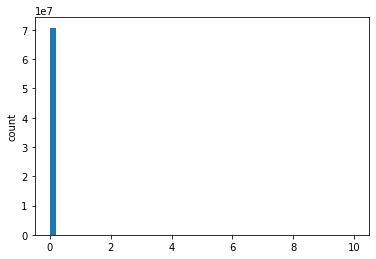

In [26]:
import matplotlib.pyplot as plt


plt.hist(dist.toarray().flatten(), bins = 50)
plt.ylabel('count')
plt.show()

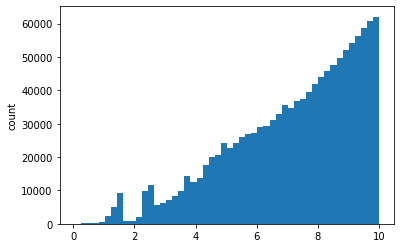

In [27]:
plt.hist(dist.values(), bins = 50)
plt.ylabel('count')
plt.show()

# Bond sizes

The bonds we're interested in are covalent (1-2 A) and non-covalent ( 2-3 A). We'll start with the short bonds.

```python
>>> (dist[:5,:5] < 2).toarray()
>>> array([[ True,  True, False, False, False],
       [ True,  True,  True, False,  True],
       [False,  True,  True,  True, False],
       [False, False,  True,  True, False],
       [False,  True, False, False,  True]])
```
Notice that the diagonal (all zeros) has returned ```True```. We can also [filter by multiplication](https://stackoverflow.com/questions/22074163/filter-values-from-a-scipy-sparse-matrix), where the ```dist[:5,:5] < 2 ``` statement returns a boolean matrix that is treated as ```True:1``` & ```False:0```:

```python
>>> dist[:5,:5].multiply(dist[:5,:5] < 2 ).toarray()
>>> array([[0.        , 1.45335784, 0.        , 0.        , 0.        ],
       [1.45335784, 0.        , 1.52283486, 0.        , 1.54520743],
       [0.        , 1.52283486, 0.        , 1.23240699, 0.        ],
       [0.        , 0.        , 1.23240699, 0.        , 0.        ],
       [0.        , 1.54520743, 0.        , 0.        , 0.        ]])

```

Stacked ```multiply``` statements are a hacky, but effective way to set custom levels of filtering:
```python
>>> dist[:5,:5].multiply(dist[:5,:5] < 2 ).multiply(dist[:5,:5] > 1).toarray()
>>> array([[0.        , 1.45335784, 0.        , 0.        , 0.        ],
       [1.45335784, 0.        , 1.52283486, 0.        , 1.54520743],
       [0.        , 1.52283486, 0.        , 1.23240699, 0.        ],
       [0.        , 0.        , 1.23240699, 0.        , 0.        ],
       [0.        , 1.54520743, 0.        , 0.        , 0.        ]])

```

# 📝 exercise 5.2 📝

Use ```dist.multiply(<filtering criteria>)``` to find the following objects from ```dist```:
* All bonds betwen 1 & 2 A
* All bonds between 2 & 3 A

# Graphs?
[Graph Theory](https://en.wikipedia.org/wiki/Graph_theory) is a branch of maths that appears often in science. A **Graph** is a collection of **nodes** and conneccting **edges**. Examples of graphs include:

| Object| Nodes| Edges|
|---|---|---|
|Chemical|atoms| bonds|
|Metrolink|Stations|Tram lines|
|wikipedia|pages|links|

Graphs are useful data structures for many applications...

```netwokx``` is a python package for creating and analysing graphs. ```networkx``` provides a few ways to construct graphs, including ```from_scipy_sparse_matrix```. 

/home/james/anaconda3/lib/python3.7/site-packages/scipy/sparse/compressed.py:287: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)


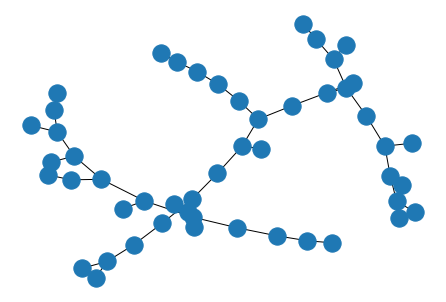

In [28]:
import networkx as nx

short_bonds = dist.multiply(dist<2).multiply(dist> 1)
G = nx.convert_matrix.from_scipy_sparse_matrix(short_bonds[:50,:50])
nx.draw(G)

# 📝 exercise 5.3 📝
Nodes and edges can store additional information, like atom identity and bond order (e.g. single, double etc). We know that the order of atom:atom distances in ```dist``` is the same as that in ```df```.

**extract the ```element symbol``` for each atom from ```df```**

❗ check ```df.tail()``` - where are the elements? ❗

In [29]:
from backtobasics import get_atom_identities

atom_identities = get_atom_identities(df)
atom_identities.head()

ID
1    N
2    C
3    C
4    O
5    C
dtype: object

# [Setting Node attributes](https://networkx.github.io/documentation/stable/tutorial.html#node-attributes)

```networkx``` nodes are dictionaries, so it's easy enough to access a node via ```G.nodes[<node key/index>]```and to set a new attribute like you would with a dictionary: ```G.nodes[<node key/index>][<new attribute name>] = 5```

Below I've made a graph for all short bonds in the protein structure and assigned them ```atom_identities```.

In [30]:
G_short_bonds = nx.convert_matrix.from_scipy_sparse_matrix(short_bonds)


for i, j  in zip(G_short_bonds, atom_identities):
    G_short_bonds.nodes[i]['element'] = j

for i in range(10):
    print(i, G_short_bonds.nodes[i])

0 {'element': 'N'}
1 {'element': 'C'}
2 {'element': 'C'}
3 {'element': 'O'}
4 {'element': 'C'}
5 {'element': 'O'}
6 {'element': 'C'}
7 {'element': 'N'}
8 {'element': 'C'}
9 {'element': 'C'}


# Back To Basics Part 6 - greatest hits

### previously ...
* We downloaded a ```.pdb``` file containing the 3D structure of a protein
* We extracted the coordinates of each atom
* We used a ```kd tree``` from ```scipy``` to find the distance between atoms < 10 A from eachother
* We made a **graph** of the structure using ```networkx``` - linking atoms that are 1-2 A from eachother (under the assumption that thsi represents covalent bonds)
* We added attributes to each node - the element symbol

### This time
* We'll tour the attributes of the ```networkx``` graph object
* We'll scratch the surface of graph algorithms for bond analysis
* We'll make custom objects using ```class```

In [31]:
# some networkx graph object attributes (data)
# nodes and edges (atoms & bonds in our case) are stored in the nx.graph object

print('A NodeView of the Graph as G.nodes or G.nodes(): \t', G_short_bonds.nodes[0])
print('An EdgeView of the Graph as G.edges or G.edges(): \t',list(G_short_bonds.edges)[0])

A NodeView of the Graph as G.nodes or G.nodes(): 	 {'element': 'N'}
An EdgeView of the Graph as G.edges or G.edges(): 	 (0, 1)


In [32]:
# some networkx graph object methods (functions)
# some basic functions

# add or remove nodes!
print('G_short_bonds.add_node \t',G_short_bonds.add_node)
print('G_short_bonds.remove_node:\t',G_short_bonds.remove_node)

print('\n') # blank line

# get neighbors of each node
print('neighbors of node #0: \t',G_short_bonds.neighbors(1))
print('lets unpack this iterator object')
print('node IDs of #1s neghbors:\t',list(G_short_bonds.neighbors(1)))
print('what are the elements are they?')
for i in list(G_short_bonds.neighbors(1)):
    print(f'node id = {i} \t ',G_short_bonds.nodes[i])

G_short_bonds.add_node 	 <bound method Graph.add_node of <networkx.classes.graph.Graph object at 0x7f8574584510>>
G_short_bonds.remove_node:	 <bound method Graph.remove_node of <networkx.classes.graph.Graph object at 0x7f8574584510>>


neighbors of node #0: 	 <dict_keyiterator object at 0x7f85745243b0>
lets unpack this iterator object
node IDs of #1s neghbors:	 [0, 2, 4]
what are the elements are they?
node id = 0 	  {'element': 'N'}
node id = 2 	  {'element': 'C'}
node id = 4 	  {'element': 'C'}


# Exercise 6.1 - atomic neighborhoods

As well as element symbols in the ```.pdb``` file, we're provided with **atom types** - identifiers for each atom based on its neighbors. Look at this:
```python
>>> df['Atom Type'].unique()
>>> ['N', 'CA', 'C', 'O', 'CB', 'OG1', 'CG2' ... ] # something like that
```
What's the pattern?

We want to see the **atom types** side by side with the atom's neighbors. Here's the breakdown:
* loop through ```G_short_bonds.nodes``` and  ```df['Atom Type']``` to set an **atom type** attribute to each node in ```G_short_bonds``` -- hint: look at setting noed attributes from last time
* now loop through ```G_short_bonds.nodes``` and for each: get the **atom type** and the element symbol for each of its neighbors using ```list(G_short_bonds.neighbors(i)```; store these how you want, I'm going to use a dictionary like this:
```python
[{'N': ['C']},
 {'CA': ['N', 'C', 'C']}, ... ]
 ```
* ```print()``` the results - we'll inspect them visually

In [34]:
from backtobasics import  find_atom_neighbors

neighborhoods = find_atom_neighbors(G_short_bonds, df)

print(neighborhoods[0:5])

[{'N': ['C']}, {'CA': ['N', 'C', 'C']}, {'C': ['C', 'O', 'N']}, {'O': ['C']}, {'CB': ['C', 'C', 'O']}]


## Exercise 6.2 - unique elements

There's a pattern!
If like me, you have a ```list``` of ```dictionaries```, then we can't use ```set()``` to find the unique values.

The aim of this exercise is to extract the unique values from ```neighborhoods```. How you do it is up to you, I'll be using loops and ```if``` statements.



In [35]:
from backtobasics import find_unique_atom_neighborhoods

uniques = find_unique_atom_neighborhoods(neighborhoods)

for i in uniques[0:5]:
    if 'O' not in i:
        print(i)

{'N': ['C']}
{'CA': ['N', 'C', 'C']}
{'C': ['C', 'O', 'N']}
{'CB': ['C', 'C', 'O']}


Since **atom types** *usually* correspond to a certain atomic neighborhood, it's safe to say that the **atom type** is determined by its neighbors. A chemist would tell you that an atoms' neighbors affect its properties. We'll look at this more in the next session.

We'll also look at using interesting **graph** algorithms provided by ```networkx``` next time. Some of the graph algorithms provided by ```networkx``` include:
* Clusetering
* Shortest paths
* Sub-structure searching
* [**and more**](https://jfinkels-networkx.readthedocs.io/en/latest/reference/algorithms/index.html?highlight=algorithms)

Can't wait? Check out the ```networkx``` [**documentation**](https://jfinkels-networkx.readthedocs.io/en/latest/index.html) for info on its capabilities.

Still thirsty for knowledge? See the ```networkx``` source code on the [networkx github](https://github.com/networkx/networkx) to see under the hood.


# ```class``` 📦 - everything's an object
On a tangent from **graphs**, we'll look at a fundamental part of ```python``` and many other **object orientated** programming languages: **objects** and ```class```📦

### what's an [object](https://en.wikipedia.org/wiki/Object_(computer_science))?
* **Broadly:** a variable in memory with an name
* **In python:** an *instance* of a ```class```  where a ```class``` is a template for the object, e.g. a ```pandas.DataFrame```

### methods & attributes
In python, objects have methods (functions that belong to the object) and attributes (data that belongs to the object). For example, our ```networkx.graph``` from earlier had:
* ```edge_list``` - **data/attribute** 
* ```nodes``` - **data/attribute**
* ```add_nodes(...)``` - **function/method**

# Lets make an object 
It will contain:
* Our protein's ```.pdb``` file
* A ```pandas.DataFrame``` that contains the atomic coordinates
* A graph of the bonds
* a useful function

In [40]:
# classes can be used to bundle functions together

class test_class:
    def useful_fn():
        for i in range(10):
            print('📦')
    def another_fn():
        print('🤮')
    
test_class.useful_fn()

📦
📦
📦
📦
📦
📦
📦
📦
📦
📦


In [ ]:
class another_class:
    # remember this fn - it lets us 
    def __init__(self):
        pass
    
another_class